In [4]:
# importing necessary librarys
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans



# Data Processing

### 2022

In [5]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2021\\JAR_FA_BLNS_2022.csv",sep=',')
dfBLN.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,01/03/2023


In [6]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2021\\JAR_FA_PLNA_2022.csv",sep=',')
dfPLNA.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,301011561,"UAB ""Rustela""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,01/01/2021,31/12/2021,02/01/2022,-91.0,-91.0,NaN,01/03/2023
1,303641352,"UAB ""Globali technologija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,01/01/2021,31/12/2021,27/05/2022,0.0,0.0,NaN,01/03/2023


In [7]:
# reading given data and visualizing it
dfRating = pd.read_csv("2021\\ImoniuReitingai2020-2021.csv",sep=',')
dfRating.head(2)

,Financial Report Name,obj_kodas,Company Reg. No.: Business Name,Company Reg. No.: Name from Register,Year (as Number),laikotarpis_nuo,Till Date,Annual Rating Value,Annual Rating Group
0,FS-59203002531-2020,59203002531,UNDA,"Sabiedrība ar ierobežotu atbildību ""UNDA""",2020,01/01/2020,31/12/2020,1.93,B
1,FS-58503016921-2020,58503016921,"Riori, SIA","SIA ""Riori""",2020,01/01/2020,31/12/2020,1.48,A


In [8]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,...,template_id_y,template_name_y,standard_id_y,standard_name_y,laikotarpis_iki_y,reg_date_y,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),31/12/2021,21/10/2022,NaN,-12.0,NaN,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,31/12/2021,04/05/2022,4595.0,4360.0,101058.0,01/03/2023


In [9]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [10]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y
0,302635624,"UAB ""Verslo krepšelis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,01/01/2021,31/12/2021,21/10/2022,2884.0,12.0,0.0,2896.0,NaN,-12.0,NaN,01/03/2023
1,304715624,"UAB ""Donstone""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,01/01/2021,31/12/2021,04/05/2022,5831.0,157443.0,52022.0,111252.0,4595.0,4360.0,101058.0,01/03/2023


In [11]:
df = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 2226 non-null   object 
 1   obj_kodas                             2226 non-null   int64  
 2   Company Reg. No.: Business Name       2169 non-null   object 
 3   Company Reg. No.: Name from Register  2225 non-null   object 
 4   Year (as Number)                      2226 non-null   int64  
 5   laikotarpis_nuo                       2226 non-null   object 
 6   Till Date                             2226 non-null   object 
 7   Annual Rating Value                   2226 non-null   float64
 8   Annual Rating Group                   2226 non-null   object 
 9   obj_pav_x                             2226 non-null   object 
 10  form_kodas_x                          2226 non-null   int64  
 11  form_pav_x       

In [12]:
# Drop rows with NaN values in both 'X' and 'Y' columns
df = df[~(df['nuosavas_kapitalas'].isna() | df['mok_sumos_ir_isipareigojimai'].isna() | df['ilgalaikis_turtas'].isna() | df['trumpalaikis_turtas'].isna() | df['pelnas_pries_apmokestinima'].isna() | df['grynasis_pelnas'].isna() | df['pardavimo_pajamos'].isna())]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 1915 non-null   object 
 1   obj_kodas                             1915 non-null   int64  
 2   Company Reg. No.: Business Name       1870 non-null   object 
 3   Company Reg. No.: Name from Register  1914 non-null   object 
 4   Year (as Number)                      1915 non-null   int64  
 5   laikotarpis_nuo                       1915 non-null   object 
 6   Till Date                             1915 non-null   object 
 7   Annual Rating Value                   1915 non-null   float64
 8   Annual Rating Group                   1915 non-null   object 
 9   obj_pav_x                             1915 non-null   object 
 10  form_kodas_x                          1915 non-null   int64  
 11  form_pav_x       

### 2021

In [13]:
# reading given data and visualizing it
dfBLN = pd.read_csv("2020\\JAR_FA_RODIKLIAI_PLNA_2021.csv",sep=',')
dfBLN.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,305390322,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),11/12/2019,31/12/2019,27/05/2021,NaN,0.0,NaN,01/03/2023
1,305213076,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),18/07/2019,31/12/2019,08/09/2021,NaN,-8042.0,NaN,01/03/2023


In [14]:
# reading given data and visualizing it
dfPLNA = pd.read_csv("2020\\JAR_FA_RODIKLIAI_BLNS_2021.csv",sep=',')
dfPLNA.head(2)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,303503376,"MB ""Edva ir ko""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,01/01/2020,31/12/2020,26/04/2021,34663.0,NaN,77286.0,49060.0,01/03/2023
1,122752323,"Uždaroji akcinė bendrovė ""ELGENA""",310,Uždaroji akcinė bendrovė,1,Reorganizuojamas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),01/01/2017,31/12/2017,13/04/2021,3285.0,4757.0,1374.0,6668.0,01/03/2023


In [15]:
# reading given data and visualizing it
dfRating = pd.read_csv("2020\\ImoniuReitingai2020-2021.csv",sep=',')
dfRating.head(2)

,Financial Report Name,obj_kodas,Company Reg. No.: Business Name,Company Reg. No.: Name from Register,Year (as Number),laikotarpis_nuo,Till Date,Annual Rating Value,Annual Rating Group
0,FS-59203002531-2020,59203002531,UNDA,"Sabiedrība ar ierobežotu atbildību ""UNDA""",2020,01/01/2020,31/12/2020,1.93,B
1,FS-58503016921-2020,58503016921,"Riori, SIA","SIA ""Riori""",2020,01/01/2020,31/12/2020,1.48,A


In [16]:
df1 = pd.merge(dfBLN, dfPLNA, on=["obj_kodas","laikotarpis_nuo"], how="inner")
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_x,obj_pav_y,form_kodas_y,form_pav_y,stat_statusas_y,stat_pav_y,template_id_y,template_name_y,standard_id_y,standard_name_y,laikotarpis_iki_y,reg_date_y,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_y
0,305390322,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),11/12/2019,31/12/2019,27/05/2021,NaN,0.0,NaN,01/03/2023,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),31/12/2019,27/05/2021,2500.0,0.0,0.0,2500.0,01/03/2023
1,305213076,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),18/07/2019,31/12/2019,08/09/2021,NaN,-8042.0,NaN,01/03/2023,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),31/12/2019,08/09/2021,-5542.0,8188.0,0.0,2646.0,01/03/2023


In [17]:
# Drop multiple columns
df1 = df1.drop(['template_id_x', 'template_name_x', 'standard_id_x', 'standard_name_x', 'template_id_y', 'standard_id_y','stat_pav_y','template_name_y','standard_name_y','laikotarpis_iki_y','reg_date_y','formavimo_data_x','obj_pav_y','form_kodas_y','form_pav_y','stat_statusas_y'], axis=1)


In [18]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df1.head(2)

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,laikotarpis_nuo,laikotarpis_iki_x,reg_date_x,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data_y
0,305390322,"UAB ""Klaineda""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,11/12/2019,31/12/2019,27/05/2021,NaN,0.0,NaN,2500.0,0.0,0.0,2500.0,01/03/2023
1,305213076,"UAB ""Danosta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,18/07/2019,31/12/2019,08/09/2021,NaN,-8042.0,NaN,-5542.0,8188.0,0.0,2646.0,01/03/2023


In [19]:
df2020 = dfRating.merge(df1, on=["obj_kodas","laikotarpis_nuo"], how='inner')
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 2232 non-null   object 
 1   obj_kodas                             2232 non-null   int64  
 2   Company Reg. No.: Business Name       2162 non-null   object 
 3   Company Reg. No.: Name from Register  2231 non-null   object 
 4   Year (as Number)                      2232 non-null   int64  
 5   laikotarpis_nuo                       2232 non-null   object 
 6   Till Date                             2232 non-null   object 
 7   Annual Rating Value                   2232 non-null   float64
 8   Annual Rating Group                   2232 non-null   object 
 9   obj_pav_x                             2232 non-null   object 
 10  form_kodas_x                          2232 non-null   int64  
 11  form_pav_x       

In [20]:
# Drop rows with NaN values in both 'X' and 'Y' columns
df2020 = df2020[~(df2020['nuosavas_kapitalas'].isna() | df2020['mok_sumos_ir_isipareigojimai'].isna() | df2020['ilgalaikis_turtas'].isna() | df2020['trumpalaikis_turtas'].isna() | df2020['pelnas_pries_apmokestinima'].isna() | df2020['grynasis_pelnas'].isna() | df2020['pardavimo_pajamos'].isna())]
df2020.reset_index(drop=True, inplace=True)
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919 entries, 0 to 1918
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 1919 non-null   object 
 1   obj_kodas                             1919 non-null   int64  
 2   Company Reg. No.: Business Name       1866 non-null   object 
 3   Company Reg. No.: Name from Register  1918 non-null   object 
 4   Year (as Number)                      1919 non-null   int64  
 5   laikotarpis_nuo                       1919 non-null   object 
 6   Till Date                             1919 non-null   object 
 7   Annual Rating Value                   1919 non-null   float64
 8   Annual Rating Group                   1919 non-null   object 
 9   obj_pav_x                             1919 non-null   object 
 10  form_kodas_x                          1919 non-null   int64  
 11  form_pav_x       

# Experiments?

In [21]:
# merge fin data of other Years
MergedFinData = pd.concat([df, df2020], axis=0, ignore_index=True)

MergedFinData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Financial Report Name                 3834 non-null   object 
 1   obj_kodas                             3834 non-null   int64  
 2   Company Reg. No.: Business Name       3736 non-null   object 
 3   Company Reg. No.: Name from Register  3832 non-null   object 
 4   Year (as Number)                      3834 non-null   int64  
 5   laikotarpis_nuo                       3834 non-null   object 
 6   Till Date                             3834 non-null   object 
 7   Annual Rating Value                   3834 non-null   float64
 8   Annual Rating Group                   3834 non-null   object 
 9   obj_pav_x                             3834 non-null   object 
 10  form_kodas_x                          3834 non-null   int64  
 11  form_pav_x       

In [26]:
# List of the 7 column names you want to select
selected_column_names = ['obj_kodas','Year (as Number)','nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos','Annual Rating Value']

# Create a new DataFrame with the selected columns
dataNoClead = MergedFinData[selected_column_names]

dataNoClead.sample(n=4, random_state=24)

,obj_kodas,Year (as Number),nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,Annual Rating Value
648,301846604,2021,2133131.0,504240.0,1925617.0,1015389.0,75661.0,71496.0,1851638.0,2.11
3735,111489643,2020,3312232.0,2062437.0,1701539.0,3716825.0,1204474.0,1021378.0,28724325.0,1.36
2102,304052912,2020,285183.0,659444.0,147791.0,796836.0,120150.0,114104.0,7218212.0,1.75
1137,165746625,2021,29283736.0,59305826.0,66871021.0,25014625.0,16417571.0,18472543.0,139106405.0,2.17


In [24]:
# rename column so would be easier to match in other tables/code
dataNoClead.rename(columns={'nuosavas_kapitalas':'nuosavas_kapitalas_Equity-NET_WORTH_BSLT00040', 'mok_sumos_ir_isipareigojimai':'mok_sumos_ir_isipareigojimai_AMOUNTS_PAYABLE_AND_LIABILITIES_BSLT00055', 'ilgalaikis_turtas':'ilgalaikis_turtas_LONG_TERM_ASSETS_BSLT00001', 'trumpalaikis_turtas':'trumpalaikis_turtas_SHORT_TERM_ASSETS_BSLT00021', 'pelnas_pries_apmokestinima':'pelnas_pries_apmokestinima_PROFIT_(LOSS)_BEFORE_TAX_ISLT00017', 'grynasis_pelnas':'grynasis_pelnas_Profit/loss_of_last_year_BSLT00052', 'pardavimo_pajamos':'pardavimo_pajamos_SALES_ISLT00001'})


,nuosavas_kapitalas44,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,Annual Rating Value
0,18915.0,1064.0,0.0,19879.0,17281.0,16415.0,27600.0,1.88
1,1961073.0,58067.0,1353537.0,2315774.0,75340.0,61073.0,165228.0,3.14
2,1124523.0,112749.0,1130785.0,106487.0,91189.0,77500.0,285375.0,2.13
3,8449.0,0.0,3460.0,32522.0,9956.0,8449.0,38591.0,3.08
4,4065.0,147715.0,4364.0,147416.0,1565.0,1565.0,294520.0,2.95
...,...,...,...,...,...,...,...,...
3829,6275855.0,2567403.0,4507240.0,4405748.0,475679.0,357597.0,10780956.0,2.08
3830,89200.0,2526013.0,1507716.0,1308891.0,44159.0,39468.0,4737976.0,3.62
3831,1192407.0,1760565.0,1282461.0,1757712.0,279059.0,250791.0,5633369.0,2.49
3832,44661.0,79778.0,41970.0,82469.0,32021.0,29537.0,419025.0,2.21


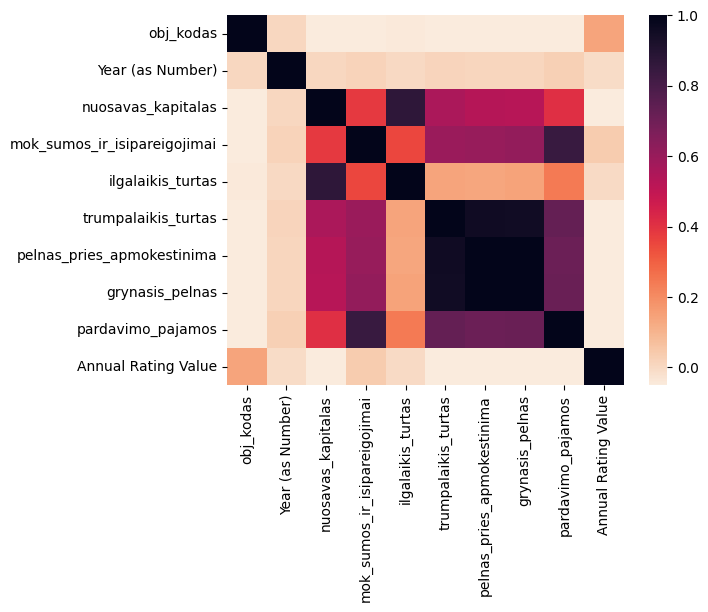

In [27]:
cmap = sns.cm.rocket_r

ax = sns.heatmap(dataNoClead.corr(),
                 annot=False,
                 fmt=".3f",
                 vmin=-0.05,
                 cmap = cmap)

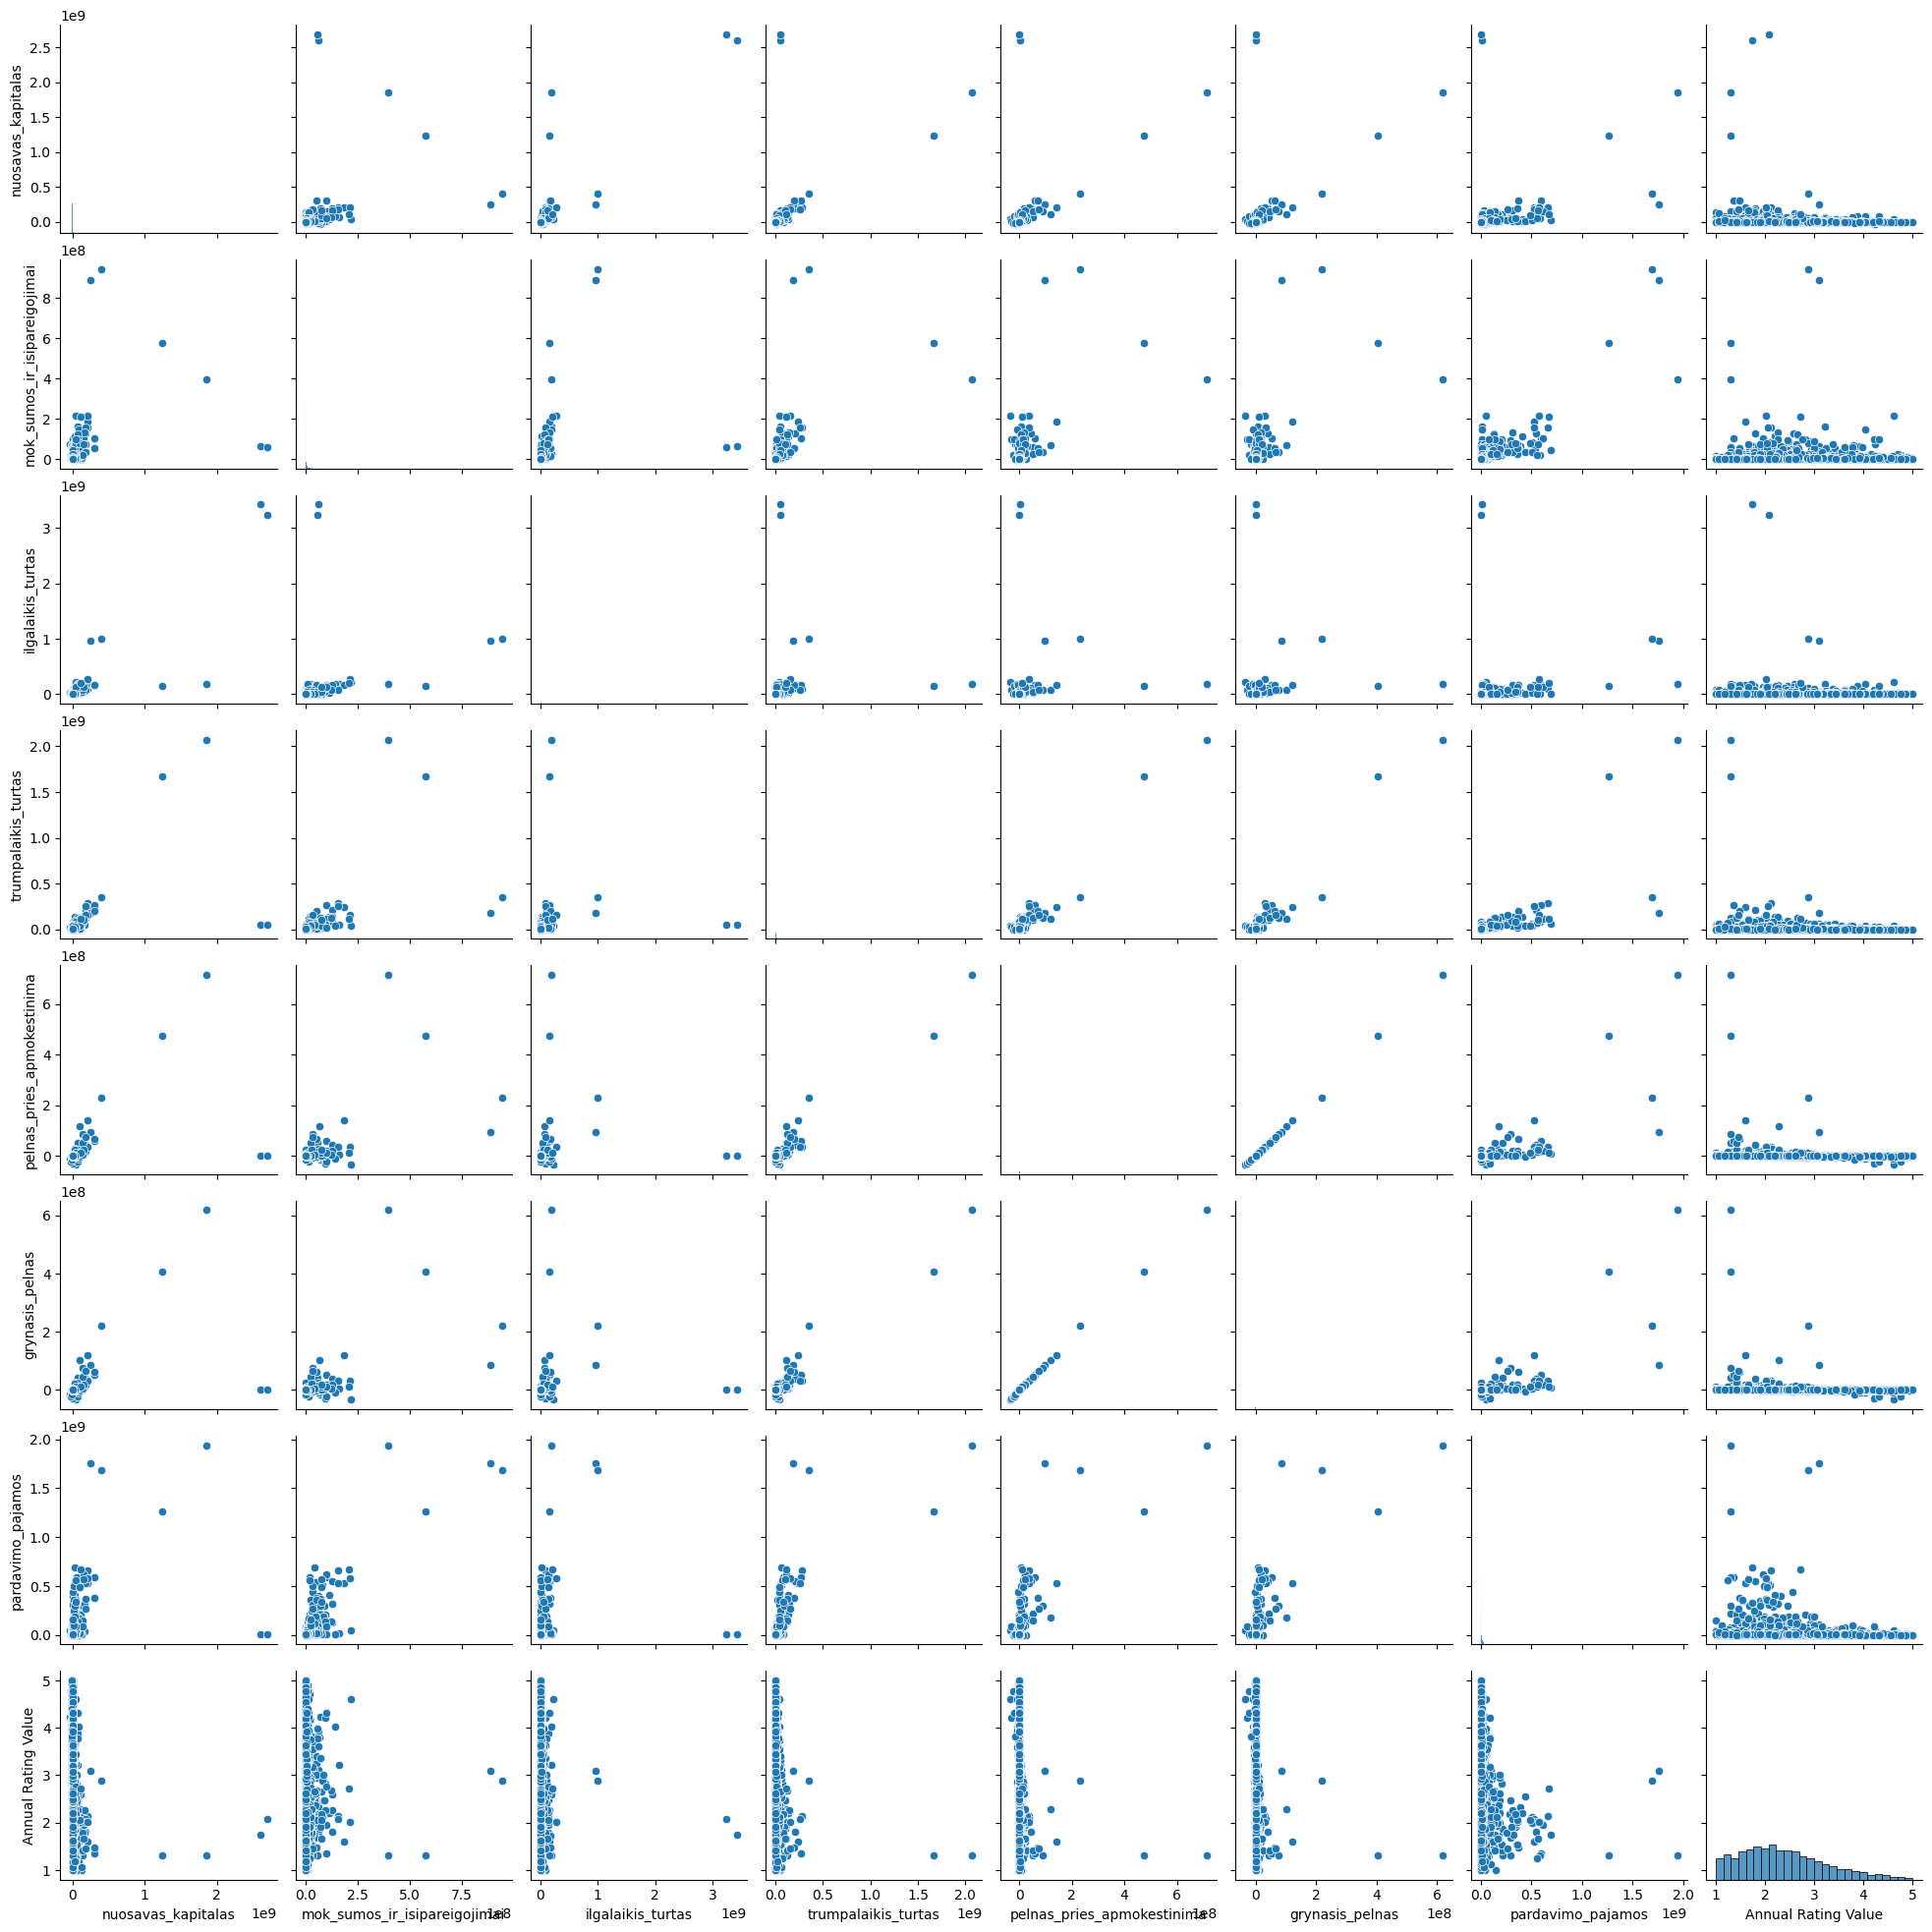

In [21]:
sns.pairplot(dataNoClead, kind="scatter")
plt.show()


In [22]:
dataNoClead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nuosavas_kapitalas            3834 non-null   float64
 1   mok_sumos_ir_isipareigojimai  3834 non-null   float64
 2   ilgalaikis_turtas             3834 non-null   float64
 3   trumpalaikis_turtas           3834 non-null   float64
 4   pelnas_pries_apmokestinima    3834 non-null   float64
 5   grynasis_pelnas               3834 non-null   float64
 6   pardavimo_pajamos             3834 non-null   float64
 7   Annual Rating Value           3834 non-null   float64
dtypes: float64(8)
memory usage: 239.8 KB


In [23]:
# Identify outliers based on a Z-score threshold
z_scores = np.abs((dataNoClead - dataNoClead.mean()) / dataNoClead.std())
data = dataNoClead[(z_scores < 3).all(axis=1)]  # Adjust the threshold as needed
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3771 entries, 0 to 3833
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nuosavas_kapitalas            3771 non-null   float64
 1   mok_sumos_ir_isipareigojimai  3771 non-null   float64
 2   ilgalaikis_turtas             3771 non-null   float64
 3   trumpalaikis_turtas           3771 non-null   float64
 4   pelnas_pries_apmokestinima    3771 non-null   float64
 5   grynasis_pelnas               3771 non-null   float64
 6   pardavimo_pajamos             3771 non-null   float64
 7   Annual Rating Value           3771 non-null   float64
dtypes: float64(8)
memory usage: 265.1 KB


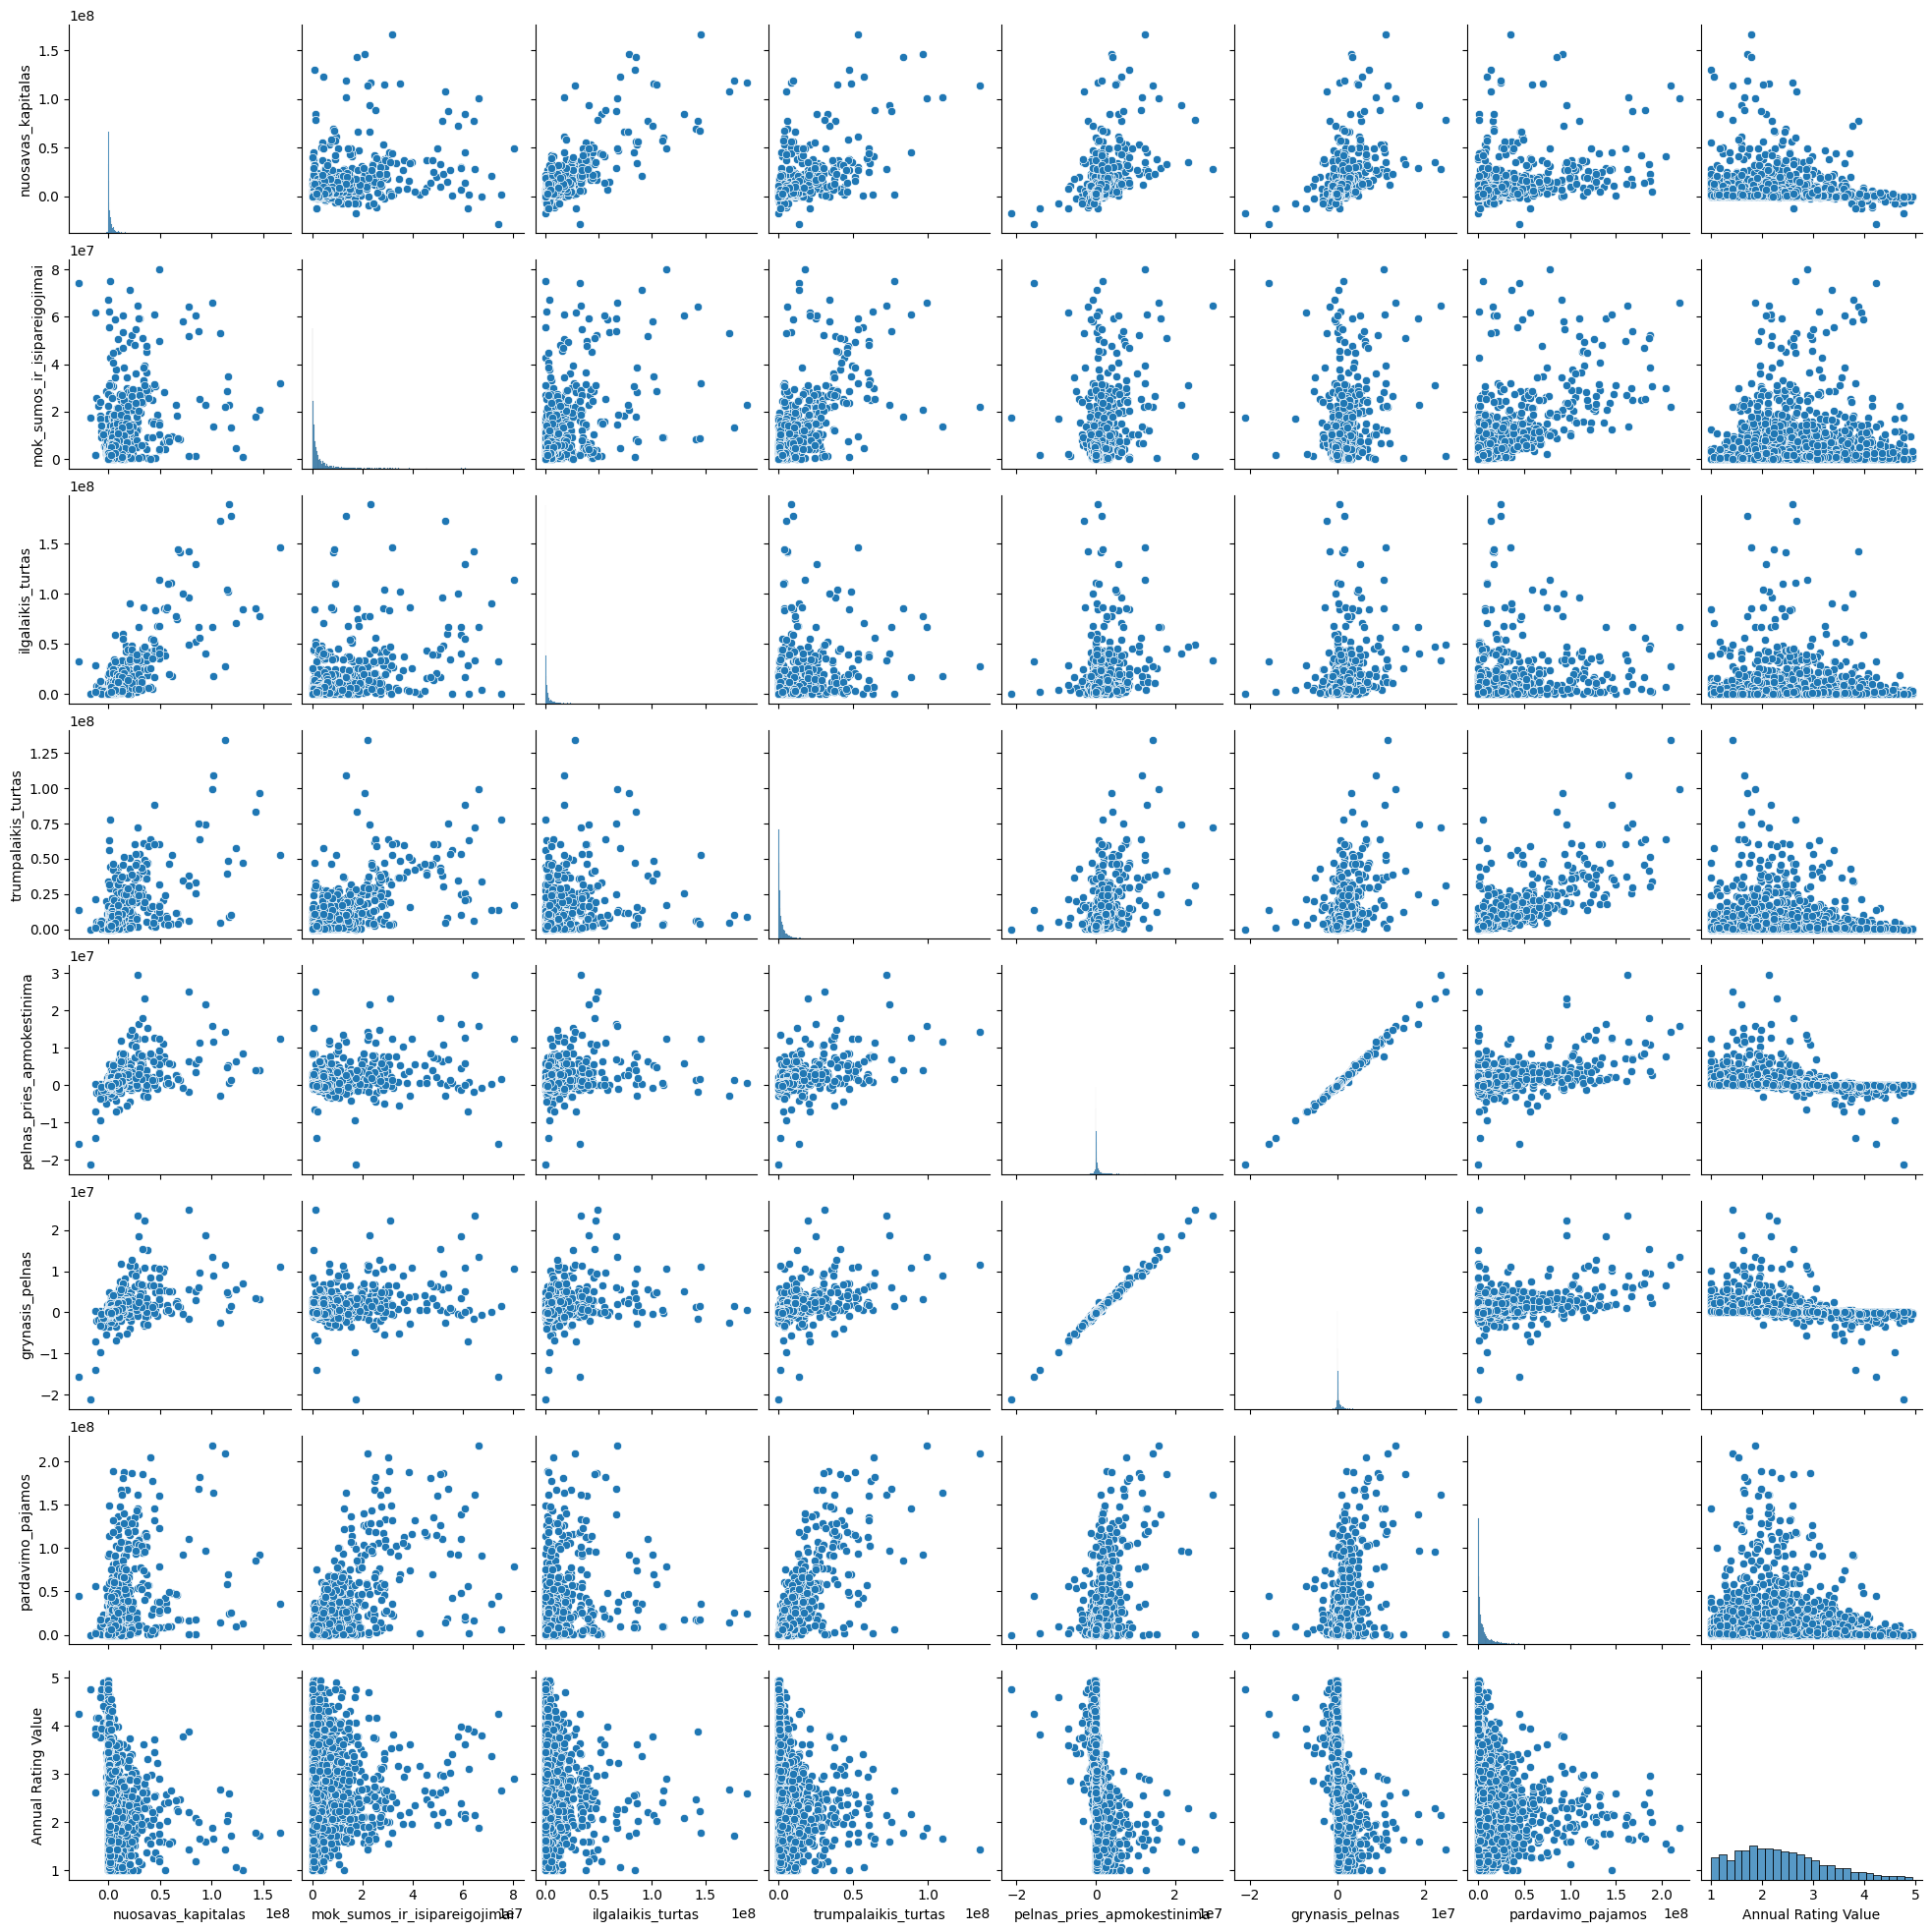

In [24]:
sns.pairplot(data, kind="scatter")
plt.show()

## Multiple Linear Regression

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# Create and fit a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Coefficients: [-2.34926026e-08  3.70466853e-08  1.48207292e-08  1.24050794e-08
 -3.11800553e-09 -1.23424830e-07 -9.05352671e-09]
Intercept: 2.394364555852331
Mean Squared Error: 0.651833564409611
R-squared: 0.1481910895307571


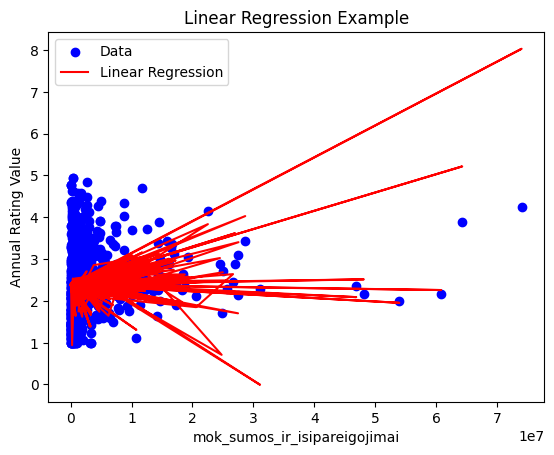

In [26]:
# Create a scatter plot with the linear regression line

# Clip the predicted values to be within the range [1, 5]
# y_pred_clipped = np.clip(y_pred, 1, 5)
plt.scatter(X_test['mok_sumos_ir_isipareigojimai'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
plt.plot(X_test['mok_sumos_ir_isipareigojimai'], y_pred, label='Linear Regression', color='red')  # Same X variable for the x-axis
plt.xlabel('mok_sumos_ir_isipareigojimai')  # Update the label to match the chosen X variable
plt.ylabel('Annual Rating Value')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

In [27]:
# Test the model on a single set of input variables
new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

print("Predicted Y8 for the new input data:")
print(predicted_y8[0])  # Print the single predicted value

Predicted Y8 for the new input data:
2.3986301301612882


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
# Test the model on a single set of input variables
new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
predicted_y8 = model.predict(new_input_data)  # Predict Y8 based on the input data

print("Predicted Y8 for the new input data:")
print(predicted_y8[0])  # Print the single predicted value

Predicted Y8 for the new input data:
-2.2608458591885117


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Polynomial Linear Regression

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['nuosavas_kapitalas', 'mok_sumos_ir_isipareigojimai', 'ilgalaikis_turtas', 'trumpalaikis_turtas', 'pelnas_pries_apmokestinima', 'grynasis_pelnas', 'pardavimo_pajamos']], data['Annual Rating Value'], test_size=0.2, random_state=42)

# Create Polynomial Features
poly = PolynomialFeatures(degree=2)  # You can choose the degree you want
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Polynomial Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5548247660713109
R-squared: 0.2749611169277376


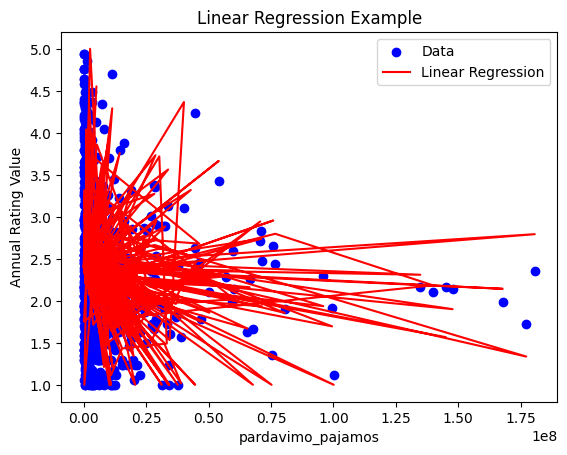

In [30]:
# Create a scatter plot with the linear regression line
# Clip the predicted values to be within the range [1, 5]
y_pred_clipped = np.clip(y_pred, 1, 5)
plt.scatter(X_test['pardavimo_pajamos'], y_test, label='Data', color='blue')  # You can choose any X variable for the x-axis
plt.plot(X_test['pardavimo_pajamos'], y_pred_clipped, label='Linear Regression', color='red')  # Same X variable for the x-axis
plt.xlabel('pardavimo_pajamos')  # Update the label to match the chosen X variable
plt.ylabel('Annual Rating Value')
plt.legend()
plt.title('Linear Regression Example')
plt.show()

In [31]:
# Test the model on new data
new_input_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])  # Replace these values with your input data
new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# Clip the predicted value to be within the range [1, 5]
predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

print("Predicted Y8 for the new input data (clipped):")
print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

Predicted Y8 for the new input data (clipped):
2.411686503582795


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [32]:
# Test the model on new data
new_input_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])  # Replace these values with your input data
new_input_data_poly = poly.transform(new_input_data)  # Transform the input data to include polynomial features
predicted_y8 = model.predict(new_input_data_poly)  # Predict Y8 based on the input data

# Clip the predicted value to be within the range [1, 5]
predicted_y8_clipped = np.clip(predicted_y8, 1, 5)

print("Predicted Y8 for the new input data (clipped):")
print(predicted_y8_clipped[0])  # Print the single predicted value (clipped to [1, 5])

Predicted Y8 for the new input data (clipped):
1.0513916301959665


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Artificial Neural Network (ANN)

In [33]:
# Replace 'your_dataset.csv' with the actual name of your dataset
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features
y = df.iloc[:, 7].values   # Output (rating)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
model = Sequential()

# Adjust the number of units and activation function as needed
model.add(Dense(units=64, activation='relu', input_dim=7))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Assuming rating is a continuous value

model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
95/95 [==============================] - 1s 2ms/step - loss: 2.8555 - val_loss: 1.0452
Epoch 2/50
95/95 [==============================] - 0s 1ms/step - loss: 0.9757 - val_loss: 0.7856
Epoch 3/50
95/95 [==============================] - 0s 1ms/step - loss: 0.6862 - val_loss: 0.5964
Epoch 4/50
95/95 [==============================] - 0s 1ms/step - loss: 0.5412 - val_loss: 0.5104
Epoch 5/50
95/95 [==============================] - 0s 1ms/step - loss: 0.4605 - val_loss: 0.4557
Epoch 6/50
95/95 [==============================] - 0s 1ms/step - loss: 0.4121 - val_loss: 0.4144
Epoch 7/50
95/95 [==============================] - 0s 1ms/step - loss: 0.3809 - val_loss: 0.3840
Epoch 8/50
95/95 [==============================] - 0s 1ms/step - loss: 0.3546 - val_loss: 0.3654
Epoch 9/50
95/95 [==============================] - 0s 1ms/step - loss: 0.3354 - val_loss: 0.3462
Epoch 10/50
95/95 [==============================] - 0s 1ms/step - loss: 0.3228 - val_loss: 0.3258
Epoch 11/50
95/95 [

In [38]:
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

 1/24 [>.............................] - ETA: 0s - loss: 0.2090

24/24 [==============================] - 0s 3ms/step - loss: 0.1457
Mean Squared Error on Test Set: 0.14572115242481232


In [39]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 84ms/step


Predicted Rating for the New Data: 2.8028228282928467


In [40]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 15ms/step
Predicted Rating for the New Data: -1.7459198236465454


## Random Forest 


In [41]:
# Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features
y = df.iloc[:, 7].values   # Output (rating)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 0.09102279951841055


In [42]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = rf_model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 3.7438999999999965


In [43]:

# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0,	13697000.0	,2890000.0,	30810000.0,	4492000.0,	4552000.0,	512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions on the new data
predicted_rating = rf_model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0]}')

Predicted Rating for the New Data: 1.7041


## Long Short-Term Memory (LSTM) 

In [44]:
# Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features
y = df.iloc[:, 7].values   # Output (rating)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM (assuming a time series sequence)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(1, 7)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

Epoch 1/50
95/95 [==============================] - 1s 4ms/step - loss: 3.7013 - val_loss: 0.9867
Epoch 2/50
95/95 [==============================] - 0s 2ms/step - loss: 1.2306 - val_loss: 0.6488
Epoch 3/50
95/95 [==============================] - 0s 2ms/step - loss: 0.7516 - val_loss: 0.5670
Epoch 4/50
95/95 [==============================] - 0s 2ms/step - loss: 0.5786 - val_loss: 0.4906
Epoch 5/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4846 - val_loss: 0.4414
Epoch 6/50
95/95 [==============================] - 0s 2ms/step - loss: 0.4159 - val_loss: 0.4007
Epoch 7/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3689 - val_loss: 0.3772
Epoch 8/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3347 - val_loss: 0.3445
Epoch 9/50
95/95 [==============================] - 0s 2ms/step - loss: 0.3102 - val_loss: 0.3212
Epoch 10/50
95/95 [==============================] - 0s 2ms/step - loss: 0.2885 - val_loss: 0.3091
Epoch 11/50
95/95 [

In [45]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Reshape the new data for prediction
scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 124ms/step
Predicted Rating for the New Data: 3.0300607681274414


In [46]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Reshape the new data for prediction
scaled_new_data = scaled_new_data.reshape(1, 1, 7)

# Make predictions on the new data
predicted_rating = model.predict(scaled_new_data)

# Output the result
print(f'Predicted Rating for the New Data: {predicted_rating[0][0]}')


1/1 [==============================] - 0s 16ms/step
Predicted Rating for the New Data: 1.517765998840332


## K-Means

In [47]:
# Assuming you have a dataset with 8 columns and named 'your_dataset.csv'
df = data

# Assuming your dataset has columns named 'col1', 'col2', ..., 'col8'
X = df.iloc[:, :7].values  # Input features

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Assuming you want to cluster the data into, for example, 3 clusters
n_clusters = 5

# Build the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model on the training data
kmeans.fit(X_train)

# Predict cluster labels for the test data
test_labels = kmeans.predict(X_test)

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[-49320.0,111953.0,8107.0,70540.0,5838.0,5838.0,	143261.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Predict the cluster for the new data
new_data_cluster = kmeans.predict(scaled_new_data)

# Output the result
print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 0


In [49]:
# Now, let's say you have new data for prediction (7 columns)
new_data = np.array([[15974000.0, 13697000.0, 2890000.0, 30810000.0, 4492000.0, 4552000.0, 512128000.0]])

# Standardize the new data using the same scaler
scaled_new_data = scaler.transform(new_data)

# Predict the cluster for the new data
new_data_cluster = kmeans.predict(scaled_new_data)

# Output the result
print(f'Predicted Cluster for the New Data: {new_data_cluster[0]}')

Predicted Cluster for the New Data: 4


C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sirme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

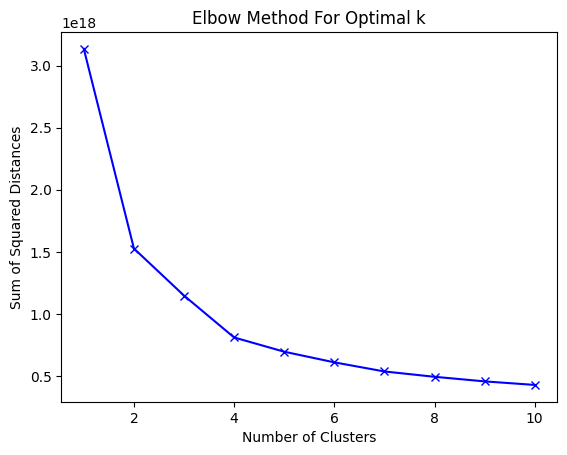

In [50]:
# Assuming X is your standardized data
sum_of_squared_distances = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()